Observation:

1: Does it getter hotter as we near the equator? The scatter plots and regressions of the latitudal data shows a generally higher max temperature for locations close to the equator.
2: There is virtually no correlation regarding change in wind speed in proximity to the equator.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?APPID={weather_api_key}&units=imperial&q="

data_dict = {
            "City": [],
            "Latitude": [],
            "Longitude": [],
            "Max Temp": [],
            "Humidity": [],
            "Cloudiness": [],
            "Wind Speed": [],
            "Country": [],
            }
print('Begining data retrieval')
counter = 1
for city in cities:
    try:
        resp_json = requests.get(base_url + city).json()
        data_dict['City'].append(resp_json['name'])
        data_dict['Latitude'].append(resp_json['coord']['lat'])
        data_dict['Longitude'].append(resp_json['coord']['lon'])
        data_dict['Max Temp'].append(resp_json['main']['temp_max'])
        data_dict['Humidity'].append(resp_json['main']['humidity'])
        data_dict['Cloudiness'].append(resp_json['clouds']['all'])
        data_dict['Wind Speed'].append(resp_json['wind']['speed'])
        data_dict['Country'].append(resp_json['sys']['country'])
        print(f"City Name: {city}. ID: {counter}")
        counter +=1
    except KeyError:
        print("Couldn't get city")
        cities.remove(city)

Begining data retrieval
Couldn't get city
City Name: ambikapur. ID: 1
City Name: hermanus. ID: 2
City Name: shima. ID: 3
City Name: chalus. ID: 4
City Name: kapaa. ID: 5
City Name: comodoro rivadavia. ID: 6
City Name: lebu. ID: 7
City Name: punta arenas. ID: 8
City Name: nikolskoye. ID: 9
City Name: new norfolk. ID: 10
City Name: isangel. ID: 11
City Name: thompson. ID: 12
City Name: chipinge. ID: 13
Couldn't get city
City Name: marsa matruh. ID: 14
City Name: kununurra. ID: 15
City Name: upernavik. ID: 16
City Name: vaini. ID: 17
City Name: sitka. ID: 18
City Name: mulanje. ID: 19
City Name: albany. ID: 20
Couldn't get city
City Name: lata. ID: 21
City Name: jamestown. ID: 22
Couldn't get city
City Name: busselton. ID: 23
City Name: butaritari. ID: 24
City Name: broken hill. ID: 25
City Name: souillac. ID: 26
City Name: preobrazheniye. ID: 27
City Name: ushuaia. ID: 28
City Name: saskylakh. ID: 29
City Name: bereda. ID: 30
City Name: arraial do cabo. ID: 31
City Name: ous. ID: 32
City

City Name: kawalu. ID: 270
City Name: vestmanna. ID: 271
City Name: gogosari. ID: 272
City Name: gourcy. ID: 273
City Name: jumla. ID: 274
City Name: riyadh. ID: 275
City Name: werda. ID: 276
Couldn't get city
City Name: port-cartier. ID: 277
City Name: bilibino. ID: 278
City Name: palmer. ID: 279
City Name: chiang kham. ID: 280
City Name: hit. ID: 281
City Name: meulaboh. ID: 282
City Name: poshekhonye. ID: 283
City Name: fortuna. ID: 284
City Name: neuville-en-ferrain. ID: 285
City Name: iskateley. ID: 286
City Name: buraydah. ID: 287
City Name: paamiut. ID: 288
City Name: lakes entrance. ID: 289
City Name: haines junction. ID: 290
City Name: zhigansk. ID: 291
City Name: trincomalee. ID: 292
City Name: svetlyy. ID: 293
City Name: visby. ID: 294
City Name: alta floresta. ID: 295
City Name: nyurba. ID: 296
City Name: storforshei. ID: 297
City Name: bulgan. ID: 298
City Name: sitio novo do tocantins. ID: 299
City Name: bentiu. ID: 300
City Name: ambon. ID: 301
City Name: pacific grove. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data_df = pd.DataFrame(data_dict)
print(len(data_df))
data_df.head()

517


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Ambikāpur,23.12,83.20,79.84,71,35,2.80,IN
1,Hermanus,-34.42,19.23,57.99,73,46,5.88,ZA
2,Shima,24.45,117.81,82.40,88,40,4.47,CN
3,Chālūs,36.66,51.42,69.80,77,0,4.70,IR
4,Kapaa,22.08,-159.32,84.20,66,20,10.29,US


In [5]:
data_df.to_csv('WeatherPy.csv',index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
too_humid = data_df.loc[data_df['Humidity'] >100]
print(data_df['Humidity'].max())
len(too_humid)

100


0

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

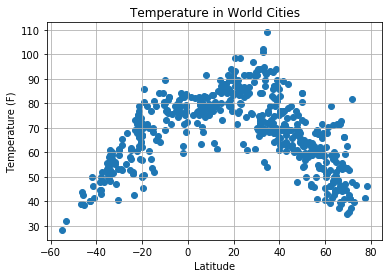

In [8]:
plt.scatter(data_df["Latitude"], data_df["Max Temp"], marker ="o")
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Temp.png")
plt.show()

## Latitude vs. Humidity Plot

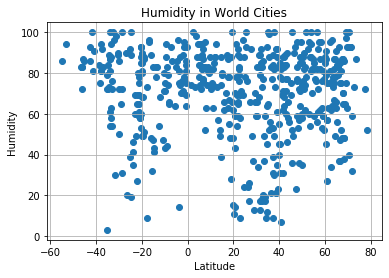

In [9]:
plt.scatter(data_df["Latitude"], data_df["Humidity"], marker ="o")
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

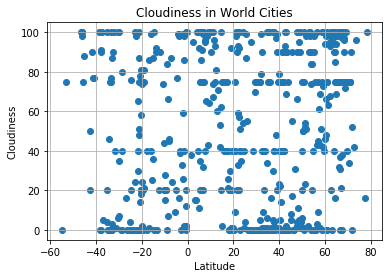

In [10]:
plt.scatter(data_df["Latitude"], data_df["Cloudiness"], marker ="o")
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

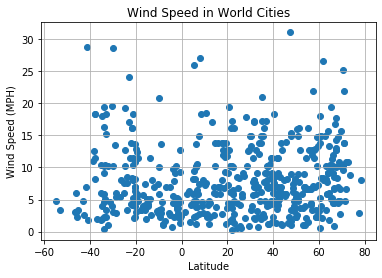

In [12]:
plt.scatter(data_df["Latitude"], data_df["Wind Speed"], marker ="o")
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Wind.png")
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression():
    (slope, intercept, r_value, p_value, std_err) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y =" +str(round(slope,2))+ "x + " + str(round(intercept,2))
    
    # plot
    plt.scatter(x, y,edgecolor="k")
    plt.plot (x, regress_values, "r-")
    plt.annotate(line_eq, (0,0.2), xycoords="axes fraction", fontsize = 12, color ="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {r_value**2}")
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = data_df.loc[data_df["Latitude"] >0]
southern_hemi = data_df.loc[data_df["Latitude"] <0]
southern_hemi.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
1,Hermanus,-34.42,19.23,57.99,73,46,5.88,ZA
5,Comodoro Rivadavia,-45.87,-67.50,42.80,87,75,2.24,AR
6,Lebu,-37.62,-73.65,52.07,92,100,18.28,CL
7,Punta Arenas,-53.15,-70.92,32.00,94,75,3.36,CL
9,New Norfolk,-42.78,147.06,39.99,86,50,2.55,AU


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5358519083669426


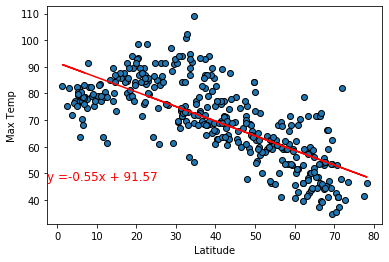

In [19]:
x = northern_hemi["Latitude"]
y = northern_hemi["Max Temp"]
y_label ="Max Temp"
regression()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6958597390339051


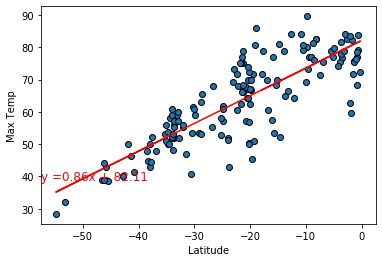

In [20]:
x = southern_hemi["Latitude"]
y = southern_hemi["Max Temp"]
y_label ="Max Temp"
regression()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.2852371246202794e-05


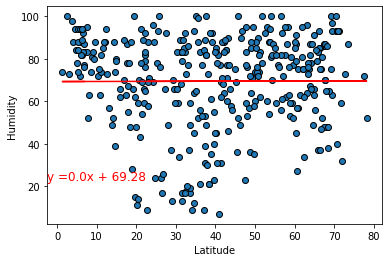

In [21]:
x = northern_hemi["Latitude"]
y = northern_hemi["Humidity"]
y_label ="Humidity"
regression()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00875334880585303


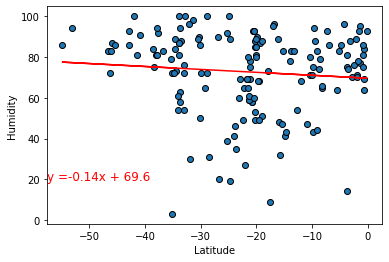

In [22]:
x = southern_hemi["Latitude"]
y = southern_hemi["Humidity"]
y_label ="Humidity"
regression()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008953544517785501


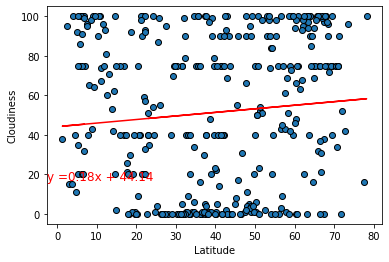

In [23]:
x = northern_hemi["Latitude"]
y = northern_hemi["Cloudiness"]
y_label ="Cloudiness"
regression()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004012522379319256


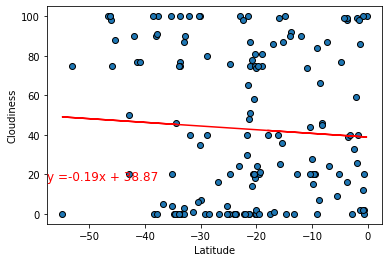

In [24]:
x = southern_hemi["Latitude"]
y = southern_hemi["Cloudiness"]
y_label ="Cloudiness"
regression()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012440230533216426


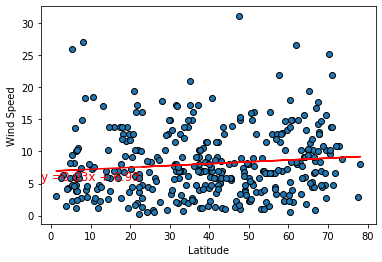

In [25]:
x = northern_hemi["Latitude"]
y = northern_hemi["Wind Speed"]
y_label ="Wind Speed"
regression()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03198287324247779


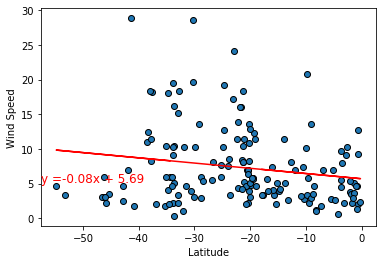

In [26]:
x = southern_hemi["Latitude"]
y = southern_hemi["Wind Speed"]
y_label ="Wind Speed"
regression()